In [287]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics


In [248]:
## load the dataset
df = pd.read_csv('M1_final.csv')
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [250]:
df = df.drop(columns=['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','TAIL_NUM','DEST','Wind'])
df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,-1,124,636,324,323,448,48,34,58,25,38,29.86,Fair / Windy,9,17,14
1,-7,371,2475,340,333,531,48,34,58,25,38,29.86,Fair / Windy,9,17,15
2,40,181,1069,301,341,482,48,34,58,25,38,29.86,Fair / Windy,9,17,22
3,-2,168,944,345,343,513,48,34,58,25,38,29.86,Fair / Windy,9,17,12
4,-4,139,760,360,356,499,46,32,58,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,Cloudy,20,32,19
28816,2,75,187,1390,1392,25,39,38,96,6,0,30.18,Cloudy,19,23,22
28817,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,Cloudy,19,23,21
28818,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,Cloudy,19,23,13


In [251]:
## regex , regular expression
df = df.replace(to_replace = r'[^a - zA -Z]', value=float('nan'),regex=True)
df.fillna(0, inplace=True)


In [252]:
df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,-1,124,636,324,323,448,48,34,58,25,38,29.86,0.0,9,17,14
1,-7,371,2475,340,333,531,48,34,58,25,38,29.86,0.0,9,17,15
2,40,181,1069,301,341,482,48,34,58,25,38,29.86,0.0,9,17,22
3,-2,168,944,345,343,513,48,34,58,25,38,29.86,0.0,9,17,12
4,-4,139,760,360,356,499,46,32,58,24,35,29.91,0.0,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,150,1370,1372,1427,39,38,96,6,0,30.18,0.0,20,32,19
28816,2,75,187,1390,1392,25,39,38,96,6,0,30.18,0.0,19,23,22
28817,283,392,2422,1125,1408,1337,39,38,96,6,0,30.18,0.0,19,23,21
28818,5,224,1598,1417,1422,261,39,38,96,6,0,30.18,0.0,19,23,13


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DEP_DELAY         28820 non-null  int64  
 1   CRS_ELAPSED_TIME  28820 non-null  int64  
 2   DISTANCE          28820 non-null  int64  
 3   CRS_DEP_M         28820 non-null  int64  
 4   DEP_TIME_M        28820 non-null  int64  
 5   CRS_ARR_M         28820 non-null  int64  
 6   Temperature       28820 non-null  int64  
 7   Dew Point         28820 non-null  object 
 8   Humidity          28820 non-null  int64  
 9   Wind Speed        28820 non-null  int64  
 10  Wind Gust         28820 non-null  int64  
 11  Pressure          28820 non-null  float64
 12  Condition         28820 non-null  float64
 13  sch_dep           28820 non-null  int64  
 14  sch_arr           28820 non-null  int64  
 15  TAXI_OUT          28820 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memo

In [254]:
## correlation matrix
corr_matrix = df.corr()
corr_matrix

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
DEP_DELAY,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,NaN,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,NaN,0.083426,-0.067669,0.070838
DISTANCE,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,NaN,0.059174,-0.088793,0.059856
CRS_DEP_M,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,NaN,-0.025621,0.495286,0.044864
DEP_TIME_M,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,NaN,0.025609,0.544197,0.057896
CRS_ARR_M,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,NaN,0.149903,0.424209,0.071377
Temperature,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,NaN,-0.022534,0.075958,-0.067574
Humidity,-0.011776,0.017198,0.015110,0.003843,-0.005923,-0.033163,0.054401,1.000000,-0.110274,-0.106828,0.033677,NaN,0.035358,-0.027042,-0.026826
Wind Speed,0.067718,-0.013440,-0.010734,0.008063,0.006033,0.014180,0.010603,-0.110274,1.000000,0.698795,-0.309978,NaN,-0.024948,-0.013499,0.062522
Wind Gust,0.044340,-0.011934,-0.009522,-0.009887,-0.014336,0.004486,-0.039487,-0.106828,0.698795,1.000000,-0.186249,NaN,-0.023190,-0.016584,0.095643


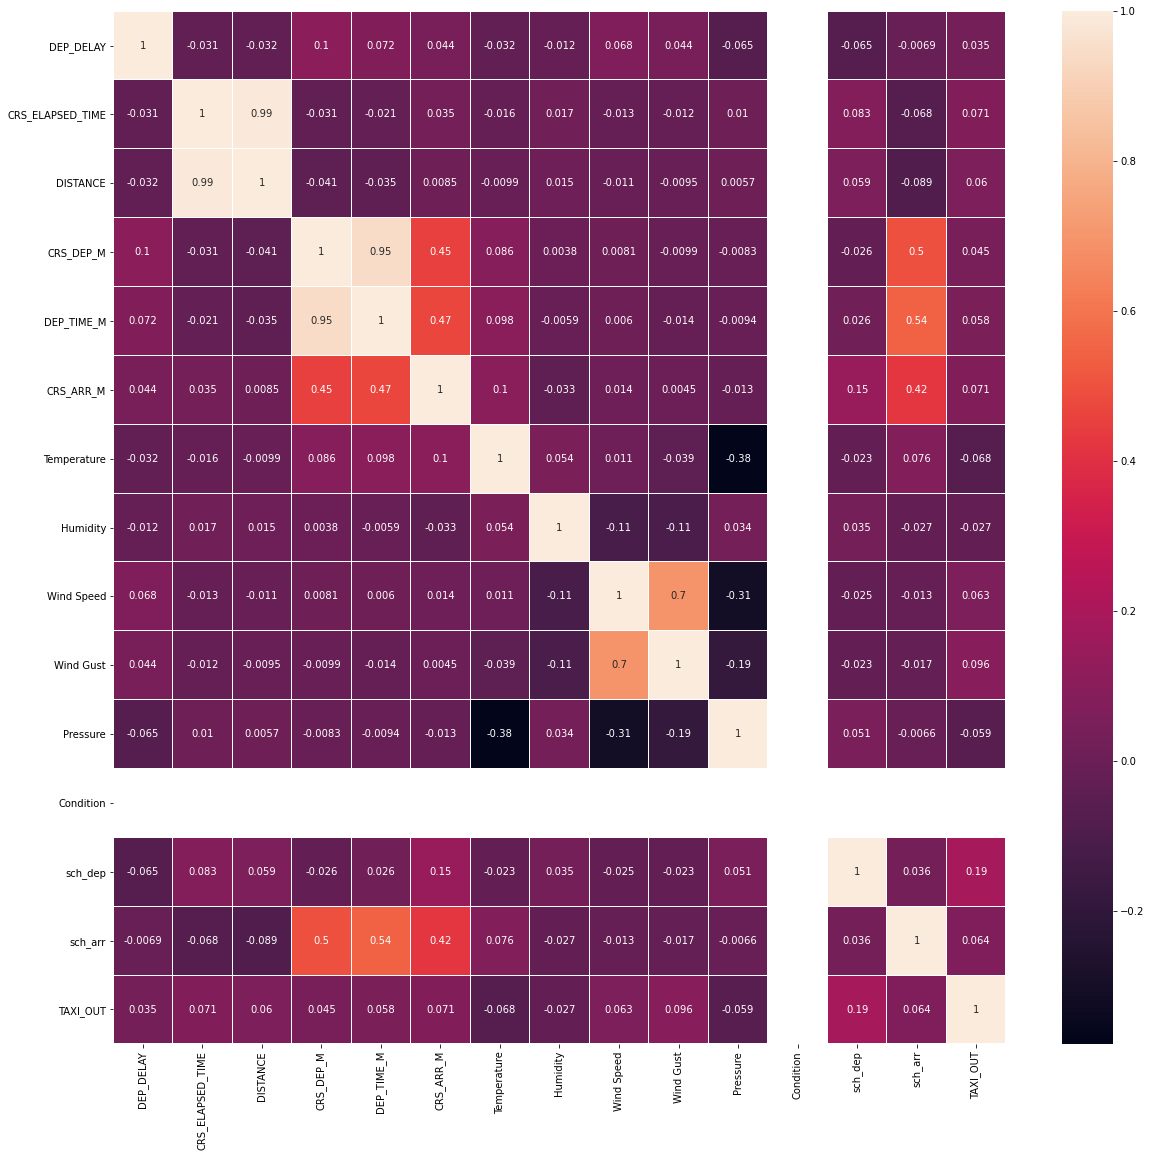

In [255]:
## heatmap
plt.figure(figsize=(20, 19))
sns.heatmap(corr_matrix,annot=True, linewidths=0.1)


Text(0, 0.5, 'CRS_DEP_M')

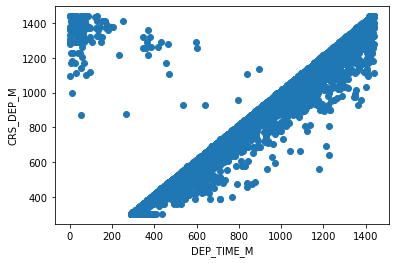

In [256]:
## exploraory data analysis
# create scatterplot of the relationship between the features and the response

##scatterplot for the departure time  vs cruise departure minutes

plt.scatter(df['DEP_TIME_M'], df['CRS_DEP_M'])

##label the axes
plt.xlabel('DEP_TIME_M')
plt.ylabel('CRS_DEP_M')



In [257]:
# split the data into independent and dependent variable    ##classsification
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values  ##  same as X = df.iloc[:, 0:3002].values
y = df.iloc[:, -1].values

In [258]:
## split the data into trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 32)

In [259]:
## train the LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [260]:
## make the prediction
pred_LR = model_LR.predict(X_test) 
pd.DataFrame({'Actual': y_test, 'Prediction': pred_LR})

,Actual,Prediction
0,23,18
1,14,16
2,22,16
3,19,18
4,20,16
...,...,...
5759,18,18
5760,16,16
5761,34,18
5762,17,15


In [261]:
## evaluate the model accuracy
accuracy_LR =accuracy_score(y_test, pred_LR)
## confusion metrics
conf_mat = confusion_matrix(y_test, pred_LR)
print(accuracy_LR)
print(conf_mat)

0.06991672449687716
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [262]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_LR))
print('MSE:', metrics.mean_squared_error(y_test, pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))
print('R2:', metrics.r2_score(y_test, pred_LR))

MAE: 5.864156835530881
MSE: 63.21738376127689
RMSE: 7.950936030510929
R2: -0.31896433561907656


In [263]:
# NAIVE BAYES
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [264]:
#predit the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_NB})

,Actual,Prediction
0,23,18
1,14,39
2,22,20
3,19,26
4,20,14
...,...,...
5759,18,18
5760,16,14
5761,34,39
5762,17,14


In [265]:
## evaluate the model accuracy
accuracy_NB = accuracy_score(y_test,y_pred_NB)
## confusion metrics
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.06158917418459403
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 3 0]
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 3 1 0]]


In [266]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_NB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_NB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_NB)))
print('R2:', metrics.r2_score(y_test, y_pred_NB))

MAE: 6.580673143650243
MSE: 78.86380985426787
RMSE: 8.880529818331103
R2: -0.6454105877209524


In [267]:
## LINEAR REGESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [268]:
pred_lin = lin_reg.predict(X_test)

In [269]:
## dataframe for predictions
pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_lin})

,Actual,Predicted
0,23,22.458696
1,14,22.782737
2,22,22.980283
3,19,24.687470
4,20,18.283287
...,...,...
5759,18,20.676642
5760,16,18.469815
5761,34,22.657980
5762,17,18.530339


In [270]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.2913446666557995
MSE: 44.054871480684156
RMSE: 6.637384385485306
R2: 0.08084136299077493


In [271]:
## LASSO - RIDGE REGRESSION
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [272]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_lasso})

,Actual,Predicted
0,23,22.337660
1,14,22.684279
2,22,22.908316
3,19,24.366575
4,20,18.911587
...,...,...
5759,18,20.736299
5760,16,19.373954
5761,34,22.311759
5762,17,18.406225


In [273]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 5.305596946161412
MSE: 44.24797107338299
RMSE: 6.651914842613591
R2: 0.0768125427385149


In [274]:
## RANDOM FOREST REGRESSION
rf_reg = RandomForestRegressor(n_estimators=100 ,random_state=32)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=32)

In [275]:
pred_rf = rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_rf})

,Actual,Predicted
0,23,26.16
1,14,19.86
2,22,23.76
3,19,18.28
4,20,20.77
...,...,...
5759,18,18.18
5760,16,21.31
5761,34,32.03
5762,17,17.19


In [282]:
## evaluate the model accuracy
accuracy_NB = accuracy_score(y_test,y_pred_NB)
## confusion metrics
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.06158917418459403
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 3 0]
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 3 1 0]]


In [277]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R2:', metrics.r2_score(y_test, pred_rf))

MAE: 4.415218598195698
MSE: 32.28609257460097
RMSE: 5.682085231198224
R2: 0.32638457796352127


In [278]:
## POLYNOMIAL REGRESSION
poly_reg = PolynomialFeatures(degree=2)
x_train_2 = poly_reg.fit_transform(X_train)
x_test_2 = poly_reg.transform(X_test)
mul_reg = LinearRegression()
mul_reg.fit(x_train_2,y_train)

LinearRegression()

In [279]:
mul_pred = mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test, 'Prediction': mul_pred})

,Actual,Prediction
0,23,21.676565
1,14,24.197380
2,22,23.371751
3,19,23.398094
4,20,18.565642
...,...,...
5759,18,19.952519
5760,16,20.175879
5761,34,22.584360
5762,17,17.845993


In [285]:
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 5.185436729662538
MSE: 42.6091278719977
RMSE: 6.527566765035629
R2: 0.11100528539394627


In [288]:
## RIDGE REGRESSION
model_rigre = Ridge(alpha=0.99, random_state = 32)
model_rigre.fit(X_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [289]:
## prediction
pred_ridge = model_rigre.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': pred_ridge})

,Actual,Prediction
0,23,22.458697
1,14,22.782842
2,22,22.980153
3,19,24.687436
4,20,18.283349
...,...,...
5759,18,20.676709
5760,16,18.469807
5761,34,22.657975
5762,17,18.530316


In [291]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.291344494456304
MSE: 44.05488485176574
RMSE: 6.637385392740558
R2: 0.08084108401719692
